In [1]:
from pyneurovault import api
import pandas as pd

In [2]:


# Get a collection
collections = api.get_collections()

Extracting NeuroVault collections meta data...
http://neurovault.org/api/collections/?limit=100&format=json
Found 469 results.
Retrieving http://neurovault.org/api/collections/?format=json&limit=100&offset=100
Retrieving http://neurovault.org/api/collections/?format=json&limit=100&offset=200
Retrieving http://neurovault.org/api/collections/?format=json&limit=100&offset=300
Retrieving http://neurovault.org/api/collections/?format=json&limit=100&offset=400


In [3]:
collections_with_DOIs = list(collections[pd.notnull(collections.DOI)].collection_id)

In [4]:
images = api.get_images_with_collections(collection_pks=collections_with_DOIs)

Extracting NeuroVault collections meta data...
Retrieving collection 1054...
Retrieving collection 35...
Retrieving collection 824...
Retrieving collection 109...
Retrieving collection 825...
Retrieving collection 865...
Retrieving collection 1039...
Retrieving collection 1056...
Retrieving collection 588...
Retrieving collection 1057...
Retrieving collection 1037...
Retrieving collection 135...
Retrieving collection 555...
Retrieving collection 1058...
Retrieving collection 838...
Retrieving collection 1059...
Retrieving collection 827...
Retrieving collection 7...
Retrieving collection 418...
Retrieving collection 419...
Retrieving collection 59...
Retrieving collection 826...
Retrieving collection 179...
Retrieving collection 550...
Retrieving collection 1060...
Retrieving collection 461...
Retrieving collection 640...
Retrieving collection 724...
Retrieving collection 1062...
Retrieving collection 834...
Retrieving collection 263...
Retrieving collection 518...
Retrieving collectio

In [5]:
images_f = images[images.analysis_level.isin(['single-subject', 'meta-analysis']) != True]
images_f = images_f[images_f.is_thresholded != True]
images_f = images_f[images_f.not_mni != True]
images_f = images_f[images_f.map_type.isin(['ROI/mask', 'parcellation', 'anatomical']) != True]
images_f = images_f[images_f.modality.isin(['fMRI-CBF', 'Diffusion MRI', 'Structural MRI']) != True]
images_f = images_f[pd.notnull(images_f.thumbnail)]
images_f = images_f[pd.isnull(images_f.label_description_file)]
images_f = images_f[pd.notnull(images_f.cognitive_paradigm_cogatlas)]
images_f = images_f[images_f.cognitive_paradigm_cogatlas.isin(['rest eyes open', 'rest eyes closed', 'None / Other']) != True]

In [6]:
pd.unique(images_f.modality)

array([u'fMRI-BOLD'], dtype=object)

In [7]:
import urllib, os
DOWNLOADS_DIR = "thumbnails"
!mkdir -p {DOWNLOADS_DIR}
for url in images_f.thumbnail:
    name = url.rsplit('/', 1)[-1]
    # Combine the name and the downloads directory to get the local filename
    filename = os.path.join(DOWNLOADS_DIR, name)
    if not os.path.isfile(filename):
        urllib.urlretrieve(url, filename)

Manuall quality control happens here

In [8]:
filenames = !ls vetted_thumbnails/
ids = [int(fname.split(".")[0].split("_")[2]) for fname in filenames]
images_f = images_f[images_f.image_id.isin(ids)]
len(images_f), len(pd.unique(images_f.collection_id))

(430, 48)

In [9]:
outfolder = "images"
standard = "/usr/local/fsl/data/standard/MNI152_T1_2mm_brain.nii.gz"
api.download_images(dest_dir=outfolder, images_df=images_f, resample=False)

,CIAS,add_date_image,analysis_level,brain_coverage,cognitive_contrast_cogatlas,cognitive_contrast_cogatlas_id,cognitive_paradigm_cogatlas,cognitive_paradigm_cogatlas_id,collection,collection_id,...,used_high_pass_filter,used_intersubject_registration,used_motion_correction,used_motion_regressors,used_motion_susceptibiity_correction,used_orthogonalization,used_reaction_time_regressor,used_slice_timing_correction,used_smoothing,used_temporal_derivatives
40,NaN,2014-03-27T21:44:20.642738Z,None,87.9024,None,None,cue approach task,trm_553e77e53497d,http://neurovault.org/collections/35/,35,...,None,None,None,None,None,None,None,None,None,None
41,NaN,2014-03-27T21:44:20.662286Z,None,87.9024,None,None,cue approach task,trm_553e77e53497d,http://neurovault.org/collections/35/,35,...,None,None,None,None,None,None,None,None,None,None
42,NaN,2014-03-27T21:44:20.625647Z,group,82.5116,high-value go choice at probe,cnt_553e7a5b2584d,cue approach task,trm_553e77e53497d,http://neurovault.org/collections/35/,35,...,None,None,None,None,None,None,None,None,None,None
43,NaN,2014-03-27T21:44:20.466555Z,None,82.5116,None,None,cue approach task,trm_553e77e53497d,http://neurovault.org/collections/35/,35,...,None,None,None,None,None,None,None,None,None,None
228,NaN,2015-03-05T20:55:05.736150Z,None,77.3506,None,None,Bistable percept paradigm,trm_553fce5d21da7,http://neurovault.org/collections/418/,418,...,None,None,None,None,None,None,None,None,None,None
229,NaN,2015-03-05T20:55:04.199563Z,None,77.3506,None,None,Bistable percept paradigm,trm_553fce5d21da7,http://neurovault.org/collections/418/,418,...,None,None,None,None,None,None,None,None,None,None
230,NaN,2015-03-05T20:55:06.536506Z,None,77.3506,None,None,Bistable percept paradigm,trm_553fce5d21da7,http://neurovault.org/collections/418/,418,...,None,None,None,None,None,None,None,None,None,None
231,NaN,2015-03-05T20:55:03.440228Z,None,68.0012,None,None,Bistable percept paradigm,trm_553fce5d21da7,http://neurovault.org/collections/418/,418,...,None,None,None,None,None,None,None,None,None,None
232,NaN,2015-03-05T20:55:07.318717Z,None,77.3506,None,None,Bistable percept paradigm,trm_553fce5d21da7,http://neurovault.org/collections/418/,418,...,None,None,None,None,None,None,None,None,None,None
233,NaN,2015-03-05T20:59:44.708895Z,None,98.3163,None,None,dual-task paradigm,trm_4da634216ebbc,http://neurovault.org/collections/419/,419,...,None,None,None,None,None,None,None,None,None,None


In [29]:
from nilearn.image import resample_img, smooth_img
from nilearn.plotting import plot_glass_brain
%matplotlib inline
import nibabel as nb
import numpy as np
from scipy.ndimage import binary_fill_holes, binary_dilation
from scipy import stats

In [43]:
filenames = !ls images/original/*.nii.gz
standard_mask = "/usr/local/fsl/data/standard/MNI152_T1_2mm_brain_mask.nii.gz"
standard_mask_data = nb.load(standard_mask).get_data()
new_standard_mask_data = binary_fill_holes(standard_mask_data)
new_standard_mask_data = binary_dilation(new_standard_mask_data, iterations=3)

!mkdir -p images/resampled
!mkdir -p images/resampled_masks

for image_id in images_f.image_id:
    fname = "%04d.nii.gz"%image_id
    print "resampling " + fname
    nii = nb.load("images/original/" + fname)
    data = nii.get_data()
    zero_mask = (data == 0)
    nan_mask = (np.isnan(data))
    missing_mask = zero_mask | nan_mask
    #missing_mask = binary_fill_holes(missing_mask != True) != True
    data[missing_mask] = np.nan
    new_nii = nb.Nifti1Image(data, nii.affine, nii.header)

    target_nii = nb.load(standard)
    resampled_nii = resample_img(new_nii,target_affine=target_nii.get_affine(), 
                                 target_shape=target_nii.shape)
    resampled_data = resampled_nii.get_data()
    zero_mask = (resampled_data == 0)
    nan_mask = (np.isnan(resampled_data))
    missing_mask = zero_mask | nan_mask
    missing_mask[new_standard_mask_data == 0] = True
    #missing_mask = binary_fill_holes(missing_mask != True) != True
    resampled_data[missing_mask] = np.nan
    resampled_data[missing_mask != True] = stats.zscore(resampled_data[missing_mask != True])
    resampled_nii = nb.Nifti1Image(resampled_data, resampled_nii.affine, resampled_nii.header)
    resampled_mask_nii = nb.Nifti1Image(missing_mask != True, resampled_nii.affine, resampled_nii.header)
    resampled_nii.to_filename("images/resampled/" + fname)
    resampled_mask_nii.to_filename("images/resampled_masks/" + fname)

resampling 0112.nii.gz
resampling 0113.nii.gz
resampling 0111.nii.gz
resampling 0110.nii.gz
resampling 2737.nii.gz
resampling 2735.nii.gz
resampling 2738.nii.gz
resampling 2734.nii.gz
resampling 2739.nii.gz
resampling 2743.nii.gz
resampling 2744.nii.gz
resampling 11979.nii.gz
resampling 11981.nii.gz
resampling 11980.nii.gz
resampling 10925.nii.gz
resampling 8625.nii.gz
resampling 8626.nii.gz
resampling 12488.nii.gz
resampling 12485.nii.gz
resampling 12491.nii.gz
resampling 12487.nii.gz
resampling 12490.nii.gz
resampling 12496.nii.gz
resampling 12492.nii.gz
resampling 12493.nii.gz
resampling 12494.nii.gz
resampling 12495.nii.gz
resampling 12486.nii.gz
resampling 12489.nii.gz
resampling 0141.nii.gz
resampling 0135.nii.gz
resampling 0138.nii.gz
resampling 0140.nii.gz
resampling 0136.nii.gz
resampling 0139.nii.gz
resampling 0180.nii.gz
resampling 0175.nii.gz
resampling 0183.nii.gz
resampling 0177.nii.gz
resampling 0181.nii.gz
resampling 0178.nii.gz
resampling 0300.nii.gz
resampling 0307.ni

In [44]:
filenames = !ls images/original/*.nii.gz

image_ids = []
FWHMx_mms = []
FWHMy_mms = []
FWHMz_mms = []
volume_voxs = []

for image_id in images_f.image_id:
    output = !smoothest -z images/resampled/{"%04d"%image_id}.nii.gz -m images/resampled_masks/{"%04d"%image_id}.nii.gz -V
    FWHMx_mm, FWHMy_mm, FWHMz_mm = [float(val[len("FWHMx = "):-3])  for val in output[-7].split(", ")]
    volume_vox = output[-2].split()[1]
    image_ids.append(image_id)
    FWHMx_mms.append(FWHMx_mm)
    FWHMy_mms.append(FWHMy_mm)
    FWHMz_mms.append(FWHMz_mm)
    volume_voxs.append(volume_vox)

In [45]:
print output

['verbose = 1', 'help = 0', 'dof = 100', 'maskname = images/resampled_masks/1897.nii.gz', 'residname = res4d', 'zstatname = images/resampled/1897.nii.gz', 'Reading mask....done', 'mask:: Size = (91,109,91)', 'mask:: ROI Size = (91,109,91)', 'mask:: Dims = (2,2,2)', 'mask:: Minimum and maximum intensities are: 0 and 1', 'Reading datafile....done', 'Data (residuals/zstat):: Size = (91,109,91,1)', 'Data (residuals/zstat):: ROI Size = (91,109,91,1)', 'Data (residuals/zstat):: Dims = (2,2,2,1)', 'Data (residuals/zstat):: Minimum and maximum intensities are: nan and nan', 'Standardising....done', 'Masked-in voxels = 196365', 'SSminus[X] = 181066, SSminus[Y] = 183820, SSminus[Z] = 180450, S2[X] = 186141, S2[Y] = 187843, S2[Z] = 185239', 'DLH 0.0111987 voxels^-3 before correcting for temporal DOF', 'FWHMx = 7.08163 voxels, FWHMy = 8.00207 voxels, FWHMz = 7.27487 voxels', 'FWHMx = 14.1633 mm, FWHMy = 16.0041 mm, FWHMz = 14.5497 mm', 'DLH 0.0111987 voxels^-3', 'VOLUME 196365 voxels', 'RESELS 412

In [46]:
df = pd.DataFrame({"FWHMx_mm": FWHMx_mms, 
                   "FWHMy_mm":FWHMy_mms, 
                   "FWHMz_mm":FWHMz_mms, 
                   "volume_vox":volume_voxs},
                  index = image_ids)
df.to_csv("smoothness_and_volume.csv")

In [263]:
!smoothest -z images/resampled/2738.nii.gz -m images/resampled_masks/2738.nii.gz -V

verbose = 1
help = 0
dof = 100
maskname = images/resampled_masks/2738.nii.gz
residname = res4d
zstatname = images/resampled/2738.nii.gz
Reading mask....done
mask:: Size = (91,109,91)
mask:: ROI Size = (91,109,91)
mask:: Dims = (2,2,2)
mask:: Minimum and maximum intensities are: 0 and 1
Reading datafile....done
Data (residuals/zstat):: Size = (91,109,91,1)
Data (residuals/zstat):: ROI Size = (91,109,91,1)
Data (residuals/zstat):: Dims = (2,2,2,1)
Data (residuals/zstat):: Minimum and maximum intensities are: nan and nan
Standardising....done
Masked-in voxels = 174274
SSminus[X] = 50021.1, SSminus[Y] = 49701.8, SSminus[Z] = 48306.3, S2[X] = 50954.8, S2[Y] = 50515, S2[Z] = 49738.3
DLH 0.00837527 voxels^-3 before correcting for temporal DOF
FWHMx = 8.65812 voxels, FWHMy = 9.24195 voxels, FWHMz = 6.88878 voxels
FWHMx = 17.3162 mm, FWHMy = 18.4839 mm, FWHMz = 13.7776 mm
DLH 0.00837527 voxels^-3
VOLUME 174274 voxels
RESELS 551.226 voxels per resel
DLH 0.00837527
VOLUME 174274
RESELS 551.226


In [264]:
!fslview images/resampled/2738.nii.gz images/resampled_masks/2738.nii.gz

In [272]:
stats.zscore?

In [36]:
new_standard_mask_data = binary_fill_holes(standard_mask_data)
new_standard_mask_data = binary_dilation(new_standard_mask_data, iterations=3)
redo = []
for image_id in images_f.image_id:
    fname = "%04d.nii.gz"%image_id
    nii = nb.load("images/original/" + fname)
    data = nii.get_data()
    zero_mask = (data == 0)
    nan_mask = (np.isnan(data))
    missing_mask = zero_mask | nan_mask
    #missing_mask = binary_fill_holes(missing_mask != True) != True
    data[missing_mask] = np.nan
    new_nii = nb.Nifti1Image(data, nii.affine, nii.header)

    target_nii = nb.load(standard)
    resampled_nii = resample_img(new_nii,target_affine=target_nii.get_affine(), 
                                 target_shape=target_nii.shape)
    resampled_data = resampled_nii.get_data()
    zero_mask = (resampled_data == 0)
    nan_mask = (np.isnan(resampled_data))
    missing_mask = zero_mask | nan_mask
    count = (missing_mask[new_standard_mask_data == 0] == False).sum()
    if count  > 0:
        print image_id, count
        redo.append(image_id)

112 11
113 11
111 4
110 4
2743 1691
2744 1691
11979 26
11981 26
11980 26
10925 26
8625 12
8626 12
12488 60
12485 58
12491 51
12487 57
12490 59
12496 78
12492 39
12493 42
12494 61
12495 77
12486 57
12489 61
305 8950
2962 699
2963 699
2960 704
2964 704
2959 699
2961 704
10773 1316
10771 1327
10770 1327
10776 1316
10768 883
10772 1327
10780 883
10766 883
10777 883
10769 1327
10767 883
10778 883
10765 883
10774 1316
10775 1316
10779 883
565 11
563 11
566 11
562 11
564 11
561 11
10804 287982
1750 71361
1590 934
1591 252
1586 4
1584 4
1585 4
1587 4
1583 4
3131 25804
3190 25872
3185 25872
3152 25732
3188 25872
3141 25779
3162 25732
3153 25732
3157 25732
3159 25732
3163 25732
3161 25732
3155 25732
3156 25732
3164 25732
3154 25732
3194 25872
3135 25777
3128 25804
3201 25872
3142 25779
3158 25732
3160 25732
3193 25872
3189 25872
3136 25777
3204 25872
3206 25872
3179 25827
3195 25872
3200 25872
3202 25872
3203 25872
3207 25872
3205 25872
3175 25773
3186 25872
3191 25872
3192 25872
3129 25804
3173

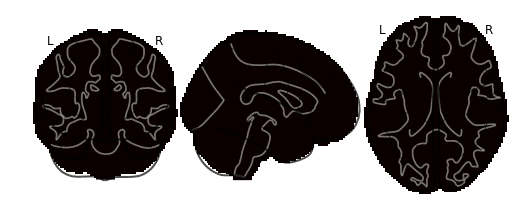

In [35]:
plot_glass_brain(nb.Nifti1Image(new_standard_mask_data, resampled_nii.affine, resampled_nii.header))

In [49]:
for id in redo:
    !rm -rf images/fake_maps/{"%04d"%id}

In [48]:
564 in redo

True